In [5]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import lag_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt
import warnings
warnings.filterwarnings('ignore')

In [6]:
#read the dataset
cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [7]:
#Checking for blanks or NA values
cola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [8]:
#Checking for duplicates
cola.duplicated().sum()

0

In [9]:
#shape of the dataset
cola.shape

(42, 2)

In [10]:
#adding quarter year column to the dataset
cola["Quarter_year"] = cola['Quarter'].str.split("_").apply(lambda x : ' 19'.join(x))
cola.head(10)

,Quarter,Sales,Quarter_year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987
5,Q2_87,2104.411995,Q2 1987
6,Q3_87,2014.362999,Q3 1987
7,Q4_87,1991.746998,Q4 1987
8,Q1_88,1869.049999,Q1 1988
9,Q2_88,2313.631996,Q2 1988


In [11]:
#adding a date column and converting the year from Quarter_year column to a proper date
cola['Date'] = (pd.to_datetime(cola['Quarter_year'].str.split(' ').apply(lambda x : ''.join(x[::-1])), dayfirst=True))
cola.head(10)

,Quarter,Sales,Quarter_year,Date
0,Q1_86,1734.827000,Q1 1986,1986-01-01
1,Q2_86,2244.960999,Q2 1986,1986-04-01
2,Q3_86,2533.804993,Q3 1986,1986-07-01
3,Q4_86,2154.962997,Q4 1986,1986-10-01
4,Q1_87,1547.818996,Q1 1987,1987-01-01
5,Q2_87,2104.411995,Q2 1987,1987-04-01
6,Q3_87,2014.362999,Q3 1987,1987-07-01
7,Q4_87,1991.746998,Q4 1987,1987-10-01
8,Q1_88,1869.049999,Q1 1988,1988-01-01
9,Q2_88,2313.631996,Q2 1988,1988-04-01


In [12]:
#Extracting the Quarters from Quarter_year
cola['Quarters'] = cola['Quarter_year'].str.replace(r'\s\d{4}', '', regex =True)
cola.head(10)

,Quarter,Sales,Quarter_year,Date,Quarters
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [13]:
#Getting dummies for quarters and adding them to the dataframe
quarters = pd.get_dummies(cola['Quarters'])
df = pd.concat((cola, quarters), axis =1)
df.head(10)

,Quarter,Sales,Quarter_year,Date,Quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2,0,1,0,0


In [14]:
#Dropping the unnecessary columns
df.drop(['Quarter', 'Quarter_year'], axis =1, inplace = True)
df.head(10)

,Sales,Date,Quarters,Q1,Q2,Q3,Q4
0,1734.827000,1986-01-01,Q1,1,0,0,0
1,2244.960999,1986-04-01,Q2,0,1,0,0
2,2533.804993,1986-07-01,Q3,0,0,1,0
3,2154.962997,1986-10-01,Q4,0,0,0,1
4,1547.818996,1987-01-01,Q1,1,0,0,0
5,2104.411995,1987-04-01,Q2,0,1,0,0
6,2014.362999,1987-07-01,Q3,0,0,1,0
7,1991.746998,1987-10-01,Q4,0,0,0,1
8,1869.049999,1988-01-01,Q1,1,0,0,0
9,2313.631996,1988-04-01,Q2,0,1,0,0


In [15]:
#Creating columns with months and years
df['Date'] = pd.to_datetime(df.Date, format= '%b-%y')
df['Month'] = df.Date.dt.strftime('%b')
df['Year'] = df.Date.dt.strftime('%Y')
df.head(10)

,Sales,Date,Quarters,Q1,Q2,Q3,Q4,Month,Year
0,1734.827000,1986-01-01,Q1,1,0,0,0,Jan,1986
1,2244.960999,1986-04-01,Q2,0,1,0,0,Apr,1986
2,2533.804993,1986-07-01,Q3,0,0,1,0,Jul,1986
3,2154.962997,1986-10-01,Q4,0,0,0,1,Oct,1986
4,1547.818996,1987-01-01,Q1,1,0,0,0,Jan,1987
5,2104.411995,1987-04-01,Q2,0,1,0,0,Apr,1987
6,2014.362999,1987-07-01,Q3,0,0,1,0,Jul,1987
7,1991.746998,1987-10-01,Q4,0,0,0,1,Oct,1987
8,1869.049999,1988-01-01,Q1,1,0,0,0,Jan,1988
9,2313.631996,1988-04-01,Q2,0,1,0,0,Apr,1988


In [16]:
#Setting date column as index
df.set_index(['Date'], inplace = True)
df.head(10)

,Sales,Quarters,Q1,Q2,Q3,Q4,Month,Year
Date,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,Jan,1986
1986-04-01,2244.960999,Q2,0,1,0,0,Apr,1986
1986-07-01,2533.804993,Q3,0,0,1,0,Jul,1986
1986-10-01,2154.962997,Q4,0,0,0,1,Oct,1986
1987-01-01,1547.818996,Q1,1,0,0,0,Jan,1987
1987-04-01,2104.411995,Q2,0,1,0,0,Apr,1987
1987-07-01,2014.362999,Q3,0,0,1,0,Jul,1987
1987-10-01,1991.746998,Q4,0,0,0,1,Oct,1987
1988-01-01,1869.049999,Q1,1,0,0,0,Jan,1988


<Axes: xlabel='Month', ylabel='Year'>

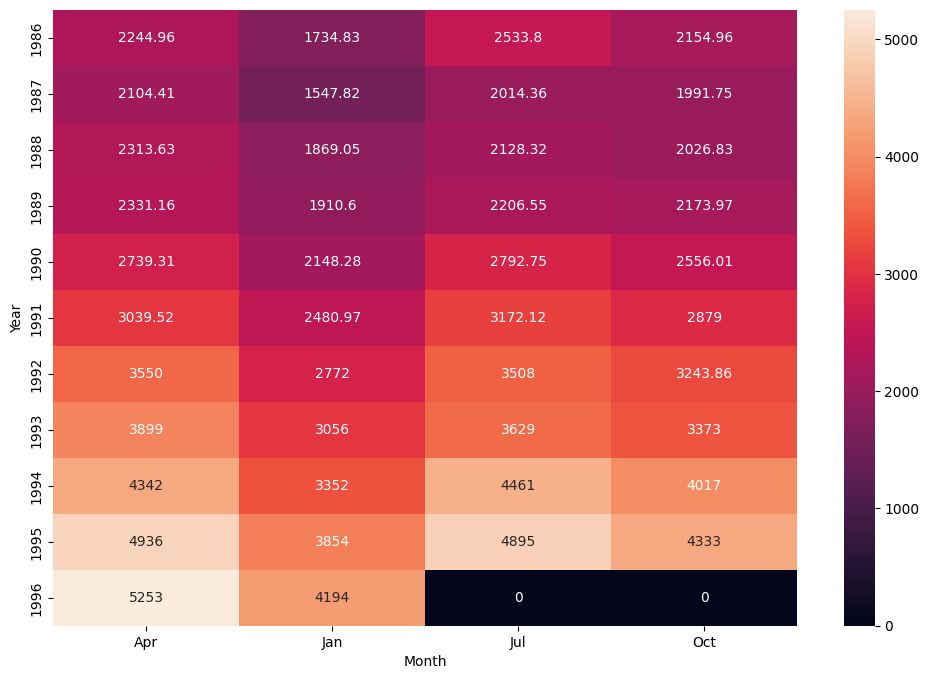

In [17]:
#Plotting a heatmap
plt.figure(figsize = (12,8))
heatmap_y_month = pd.pivot_table(data= df, values = 'Sales', index= 'Year', columns = 'Month', aggfunc = 'mean', fill_value= 0)
sns.heatmap(heatmap_y_month, annot = True, fmt ='g')

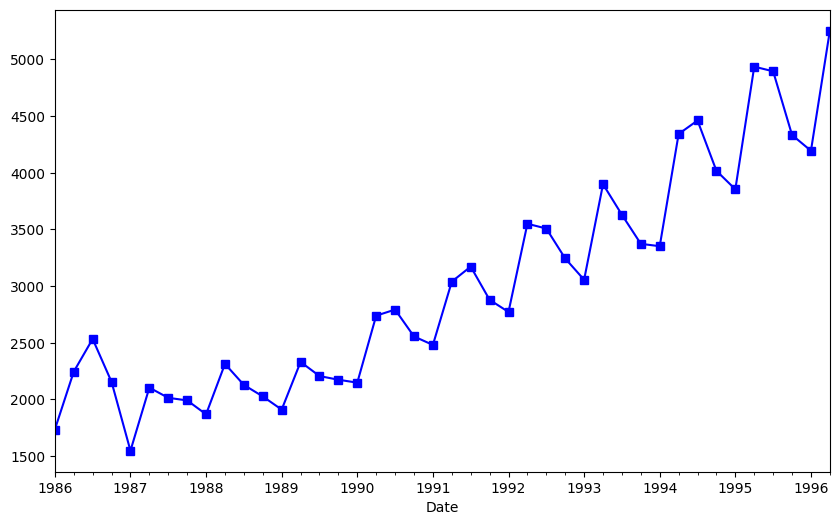

In [18]:
#Plotting a line plot for Sales
df['Sales'].plot(figsize= (10,6), color = 'blue', marker = 's')
plt.show()

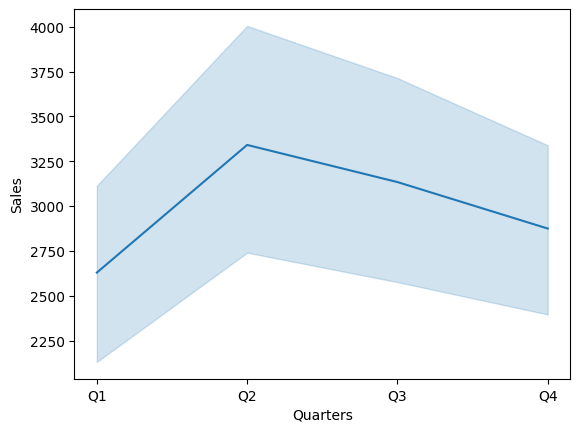

In [19]:
#plotting a line plot for sales and quarters
sns.lineplot(y = 'Sales', x = 'Quarters', data = df)
plt.show()

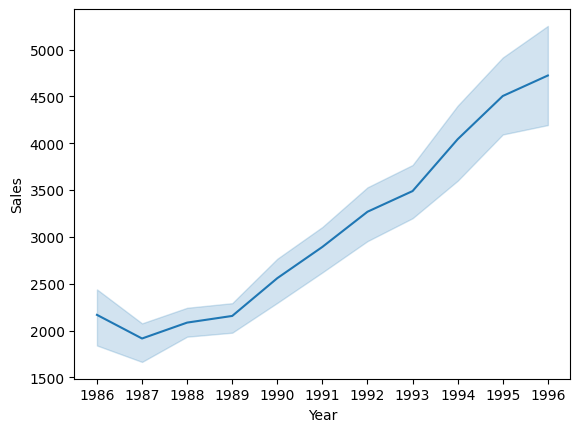

In [20]:
#plotting a line plot for sales and Year
sns.lineplot(y = 'Sales', x = 'Year', data = df)
plt.show()

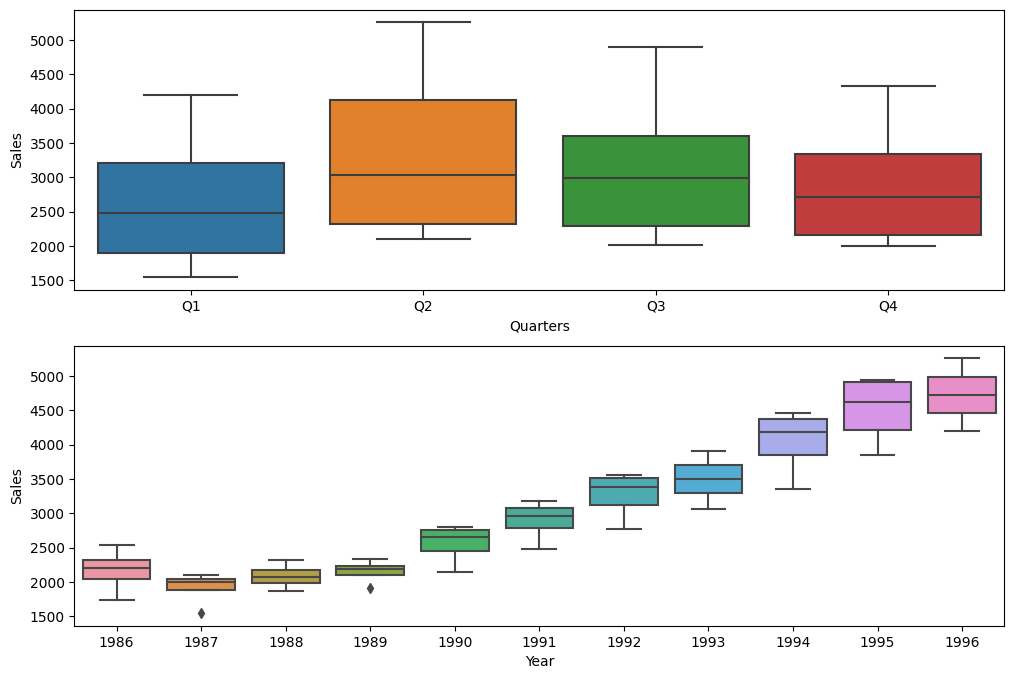

In [21]:
#boxplot for Sales with Years and months
plt.figure(figsize= (12, 8))
plt.subplot(211)
sns.boxplot(y = 'Sales', x = 'Quarters', data= df)
plt.subplot(212)
sns.boxplot(y = 'Sales', x = 'Year', data= df)
plt.show()

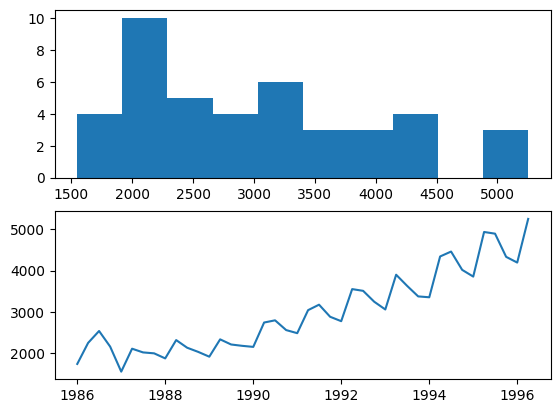

In [22]:
#histogram and line plot for Sales
plt.subplot(211)
plt.hist(df["Sales"])
plt.subplot(212)
plt.plot(df["Sales"])
plt.show()

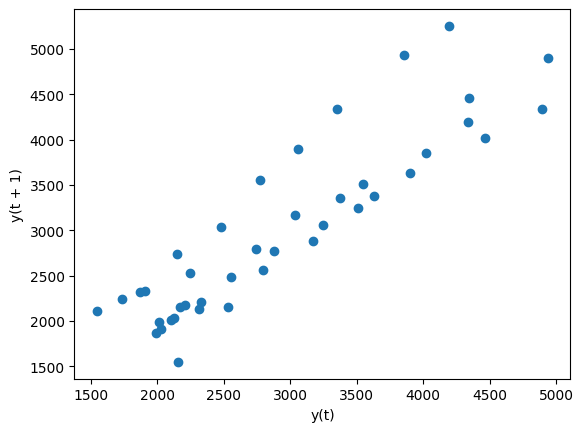

In [23]:
lag_plot(df['Sales'])
plt.show()

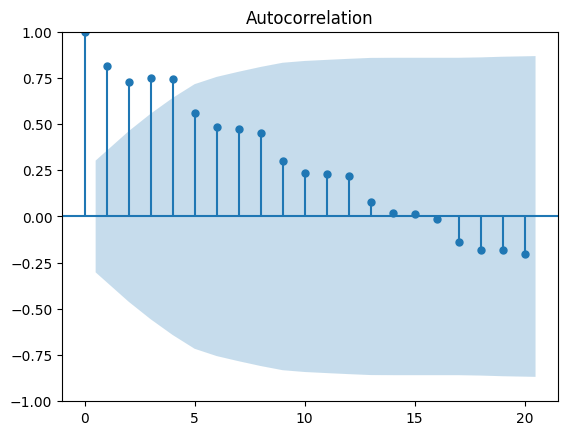

In [24]:
#plotting an acf plot
plot_acf(df.Sales, lags= 20)
plt.show()

In [25]:
df.head(10)

,Sales,Quarters,Q1,Q2,Q3,Q4,Month,Year
Date,,,,,,,,
1986-01-01,1734.827000,Q1,1,0,0,0,Jan,1986
1986-04-01,2244.960999,Q2,0,1,0,0,Apr,1986
1986-07-01,2533.804993,Q3,0,0,1,0,Jul,1986
1986-10-01,2154.962997,Q4,0,0,0,1,Oct,1986
1987-01-01,1547.818996,Q1,1,0,0,0,Jan,1987
1987-04-01,2104.411995,Q2,0,1,0,0,Apr,1987
1987-07-01,2014.362999,Q3,0,0,1,0,Jul,1987
1987-10-01,1991.746998,Q4,0,0,0,1,Oct,1987
1988-01-01,1869.049999,Q1,1,0,0,0,Jan,1988


In [26]:
#upscale the sample
upsampled = df.drop(['Quarters', 'Q1', 'Q2', 'Q3', 'Q4', 'Month', 'Year'], axis=1)
upsampled = upsampled.resample('M').mean()
print(upsampled.head(10))

                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28          NaN
1986-03-31          NaN
1986-04-30  2244.960999
1986-05-31          NaN
1986-06-30          NaN
1986-07-31  2533.804993
1986-08-31          NaN
1986-09-30          NaN
1986-10-31  2154.962997


                  Sales
Date                   
1986-01-31  1734.827000
1986-02-28  1904.871666
1986-03-31  2074.916332
1986-04-30  2244.960999
1986-05-31  2341.242330
1986-06-30  2437.523661
1986-07-31  2533.804993
1986-08-31  2407.524328
1986-09-30  2281.243663
1986-10-31  2154.962997


<Figure size 1000x600 with 0 Axes>

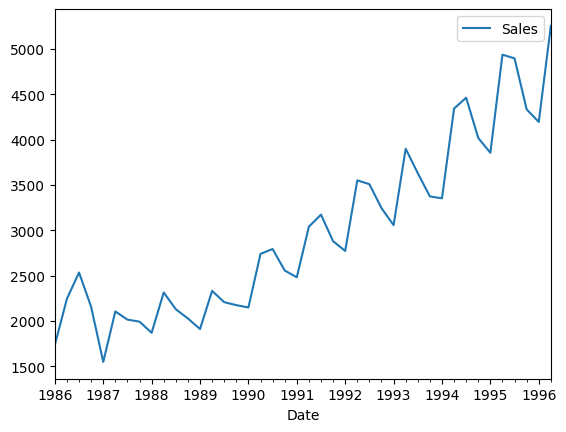

In [27]:
#interpolate the values and plot a graph
interpolated = upsampled.interpolate(method = 'linear')
print(interpolated.head(10))
plt.figure(figsize = (10,6))
interpolated.plot()
plt.show()

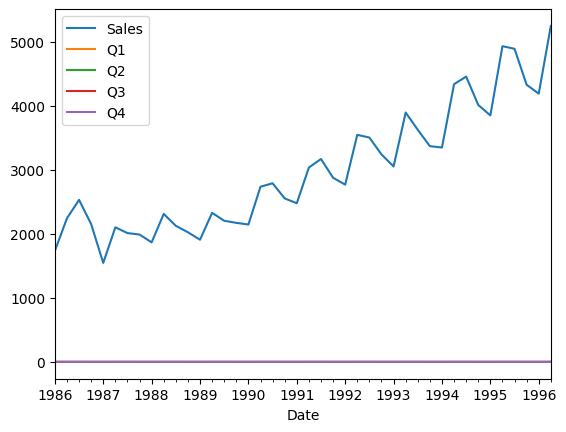

In [28]:
#plotting the original dataset to compare with the upscaled dataset
df.plot()
plt.show()

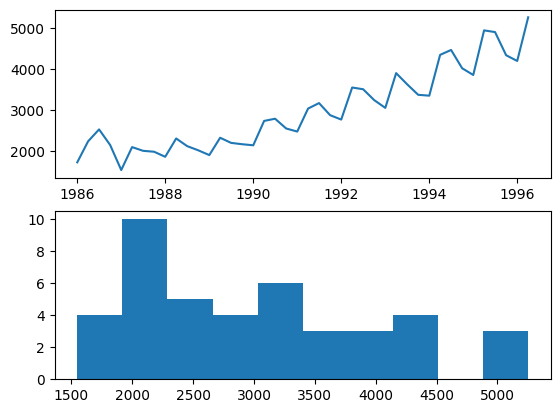

In [29]:
#plotting the distribution of the dataset to check for seasonality and trend
plt.subplot(211)
plt.plot(df['Sales'])
plt.subplot(212)
plt.hist(df['Sales'])
plt.show()

In [30]:
#Square root transformation
sqrt_trns = pd.DataFrame(df['Sales'].values)
sqrt_trns.columns = ['Sales']
sqrt_trns['Sales'] = np.sqrt(sqrt_trns['Sales'])
sqrt_trns

,Sales
0,41.651254
1,47.381019
2,50.336915
3,46.421579
4,39.342331
5,45.873871
6,44.881655
7,44.628993
8,43.232511
9,48.100229


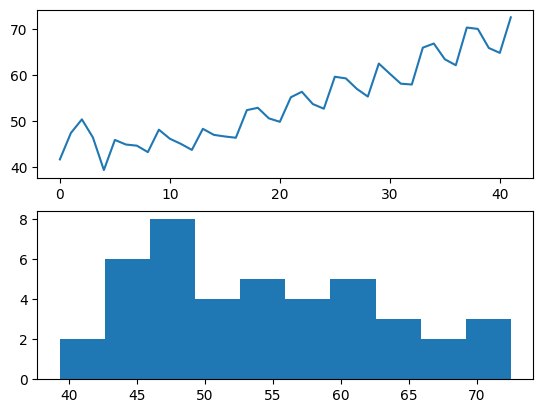

In [31]:
plt.subplot(211)
plt.plot(sqrt_trns)
plt.subplot(212)
plt.hist(sqrt_trns)
plt.show()

In [32]:
#Log transformation
log_trns = pd.DataFrame(df['Sales'].values)
log_trns.columns = ['Sales']
log_trns['Sales'] = np.log(log_trns["Sales"])
log_trns

,Sales
0,7.458663
1,7.716443
2,7.837477
3,7.675529
4,7.344602
5,7.651791
6,7.608058
7,7.596767
8,7.533186
9,7.746574


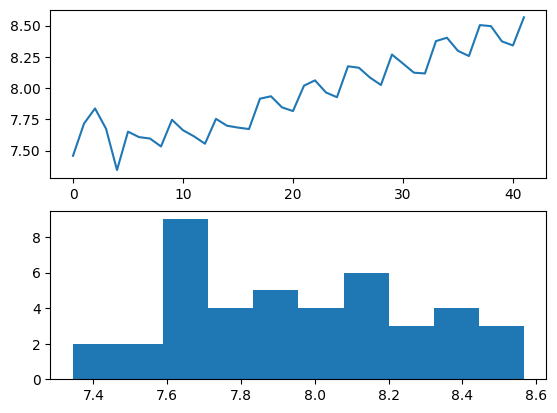

In [33]:
plt.subplot(211)
plt.plot(log_trns)
plt.subplot(212)
plt.hist(log_trns)
plt.show()

In [34]:
#Splitting the data into training and testing
Train = interpolated.head(100)
Test = interpolated.tail(24)

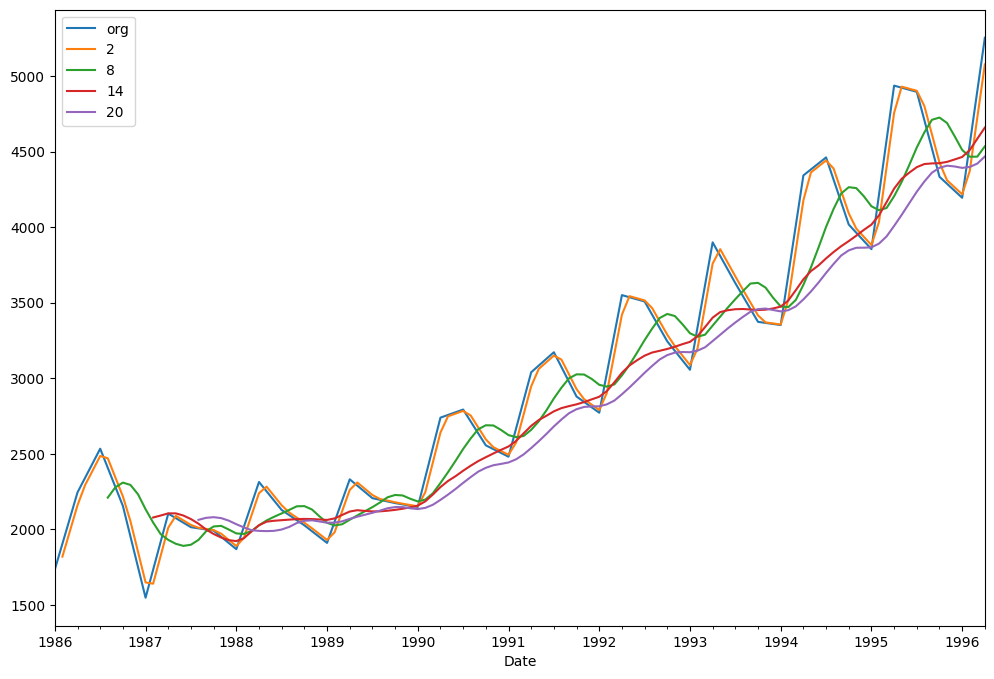

In [35]:
#plotting a moving average graph
plt.figure(figsize= (12,8))
interpolated['Sales'].plot(label = 'org')
for i in range(2,24,6):
  interpolated['Sales'].rolling(i).mean().plot(label = str(i))
plt.legend(loc ='best')

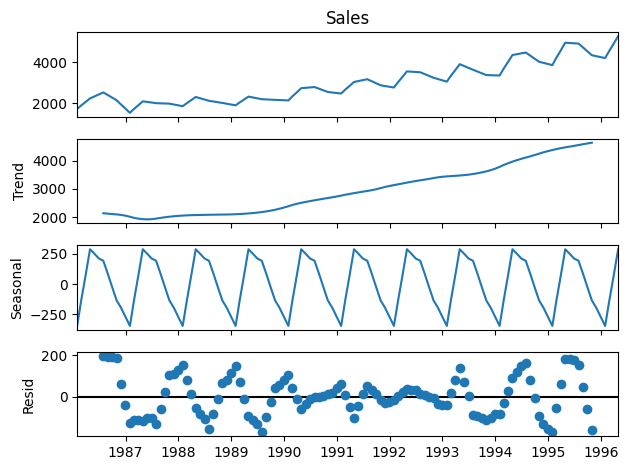

In [36]:
#plotting a decomposition graph
decompose = seasonal_decompose(interpolated['Sales'])
decompose.plot()
plt.show()

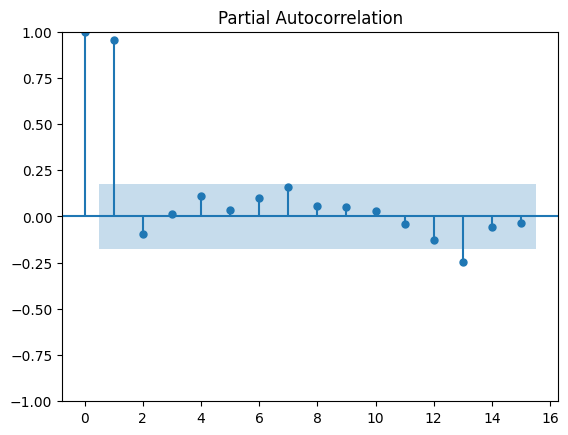

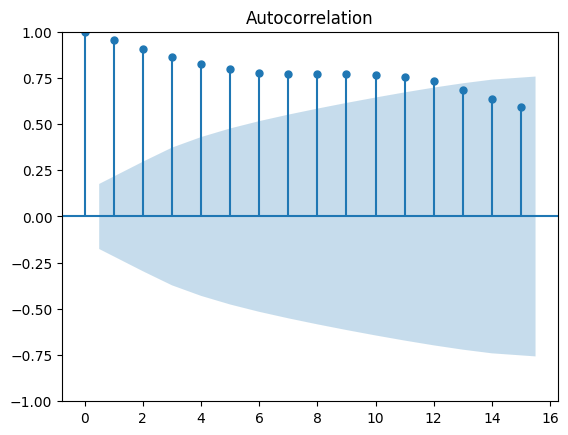

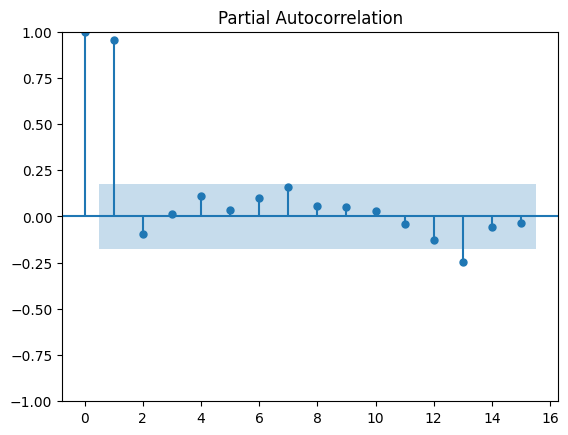

In [37]:
#plotting acf and pacf plots
plot_acf(interpolated['Sales'], lags=15)
plot_pacf(interpolated['Sales'], lags=15)

In [72]:
#Building a Simple Exponential Smoothing Model and printing the RMSE Values
ses_model = SimpleExpSmoothing(Train['Sales']).fit(smoothing_level =0.2)
pred_ses = ses_model.predict(start= Test.index[0], end = Test.index[-1])
rmse_ses = np.sqrt(mean_squared_error(Test.Sales, pred_ses))
print(f"RMSE for Simple Exponential Model is : {rmse_ses}")

RMSE for Simple Exponential Model is : 802.7475367584902


In [73]:
#Building a Holt Smoothing model and printing the RMSE values
hw_model = Holt(Train['Sales']).fit(smoothing_level =0.2)
pred_hw = ses_model.predict(start= Test.index[0], end = Test.index[-1])
rmse_hw = np.sqrt(mean_squared_error(Test.Sales, pred_hw))
print(f"RMSE for Holt's Smoothing Model is : {rmse_hw}")

RMSE for Holt's Smoothing Model is : 802.7475367584902


In [74]:
#Building a Simple Exponential Smoothing model with additive seasonality and additive trend and printing the RMSE Value and MAPE values
hw_model_add_add = ExponentialSmoothing(Train['Sales'], seasonal='add', trend = 'add', seasonal_periods = 12).fit(smoothing_level = 0.20)
pred_hw_add_add = hw_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
rmse_hw_add_mul = np.sqrt(mean_squared_error(Test.Sales, pred_hw_add_add))
print(f"RMSE for Simple Exponential Model with add Seasonality and add trend is : {rmse_hw_add_mul}")

RMSE for Simple Exponential Model with add Seasonality and add trend is : 291.07813783221803


In [75]:
#Building a Simple Exponential Smoothing model with multiplicative seasonality and additive trend and printing the RMSE Value and MAPE values
hw_model_mul_add = ExponentialSmoothing(Train['Sales'], seasonal='mul', trend = 'add', seasonal_periods = 12).fit(smoothing_level = 0.20)
pred_hw_mul_add = hw_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
rmse_hw_mul_add = np.sqrt(mean_squared_error(Test.Sales, pred_hw_mul_add))
print(f"RMSE for Simple Exponential Model is : {rmse_hw_mul_add}")

RMSE for Simple Exponential Model is : 253.23743559719398


In [42]:
#Building model on the entire data with the lowest RMSE Value
hwe_model_mul_add = ExponentialSmoothing(interpolated['Sales'], seasonal = 'mul', trend ='add', seasonal_periods = 12).fit()

In [43]:
# Forecasting for the next 12 periods
hwe_model_mul_add.forecast(12)

1996-05-31    5223.377587
1996-06-30    5196.754964
1996-07-31    5169.490306
1996-08-31    4992.791240
1996-09-30    4812.085186
1996-10-31    4622.807246
1996-11-30    4494.160504
1996-12-31    4345.259925
1997-01-31    4208.172292
1997-02-28    4550.924772
1997-03-31    4900.923997
1997-04-30    5254.613009
Freq: M, dtype: float64

In [44]:
#Creating a copy of the dataset
new_df = interpolated.copy()

In [45]:
#Resseting the index value
new_df.reset_index(inplace= True)

In [46]:
new_df['t'] = 1
new_df.head(10)

,Date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,1
2,1986-03-31,2074.916332,1
3,1986-04-30,2244.960999,1
4,1986-05-31,2341.242330,1
5,1986-06-30,2437.523661,1
6,1986-07-31,2533.804993,1
7,1986-08-31,2407.524328,1
8,1986-09-30,2281.243663,1
9,1986-10-31,2154.962997,1


In [47]:
#Assigning new values to t variable
for i,row in new_df.iterrows():
  new_df['t'].iloc[i] = i+1
new_df

,Date,Sales,t
0,1986-01-31,1734.827000,1
1,1986-02-28,1904.871666,2
2,1986-03-31,2074.916332,3
3,1986-04-30,2244.960999,4
4,1986-05-31,2341.242330,5
...,...,...,...
119,1995-12-31,4240.333333,120
120,1996-01-31,4194.000000,121
121,1996-02-29,4547.000000,122
122,1996-03-31,4900.000000,123


In [48]:
#Adding log column with logarithmic value of the sales column
new_df['log_Sales'] = np.log(new_df['Sales'])
new_df

,Date,Sales,t,log_Sales
0,1986-01-31,1734.827000,1,7.458663
1,1986-02-28,1904.871666,2,7.552170
2,1986-03-31,2074.916332,3,7.637676
3,1986-04-30,2244.960999,4,7.716443
4,1986-05-31,2341.242330,5,7.758437
...,...,...,...,...
119,1995-12-31,4240.333333,120,8.352397
120,1996-01-31,4194.000000,121,8.341410
121,1996-02-29,4547.000000,122,8.422223
122,1996-03-31,4900.000000,123,8.496990


In [49]:
#Adding t_sq column with square of values from t column
new_df['t_sq'] = new_df['t']**2
new_df

,Date,Sales,t,log_Sales,t_sq
0,1986-01-31,1734.827000,1,7.458663,1
1,1986-02-28,1904.871666,2,7.552170,4
2,1986-03-31,2074.916332,3,7.637676,9
3,1986-04-30,2244.960999,4,7.716443,16
4,1986-05-31,2341.242330,5,7.758437,25
...,...,...,...,...,...
119,1995-12-31,4240.333333,120,8.352397,14400
120,1996-01-31,4194.000000,121,8.341410,14641
121,1996-02-29,4547.000000,122,8.422223,14884
122,1996-03-31,4900.000000,123,8.496990,15129


In [50]:
#Adding the month and year columns to the dataset
new_df['Month'] = new_df.Date.dt.strftime('%b')
new_df['Year'] = new_df.Date.dt.strftime('%Y')
new_df

,Date,Sales,t,log_Sales,t_sq,Month,Year
0,1986-01-31,1734.827000,1,7.458663,1,Jan,1986
1,1986-02-28,1904.871666,2,7.552170,4,Feb,1986
2,1986-03-31,2074.916332,3,7.637676,9,Mar,1986
3,1986-04-30,2244.960999,4,7.716443,16,Apr,1986
4,1986-05-31,2341.242330,5,7.758437,25,May,1986
...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,8.352397,14400,Dec,1995
120,1996-01-31,4194.000000,121,8.341410,14641,Jan,1996
121,1996-02-29,4547.000000,122,8.422223,14884,Feb,1996
122,1996-03-31,4900.000000,123,8.496990,15129,Mar,1996


In [51]:
#getting the dummies columns for the month columns and storing it in a variable
months = pd.get_dummies(new_df['Month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,1,0,0,0,0,0,0,0
121,0,0,0,1,0,0,0,0,0,0,0,0
122,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
#ordering the month column
months[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
119,0,0,0,0,0,0,0,0,0,0,0,1
120,1,0,0,0,0,0,0,0,0,0,0,0
121,0,1,0,0,0,0,0,0,0,0,0,0
122,0,0,1,0,0,0,0,0,0,0,0,0


In [53]:
#joining the months with the dataset
Cola = pd.concat([new_df, months], axis=1)
Cola

,Date,Sales,t,log_Sales,t_sq,Month,Year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1986-01-31,1734.827000,1,7.458663,1,Jan,1986,0,0,0,0,1,0,0,0,0,0,0,0
1,1986-02-28,1904.871666,2,7.552170,4,Feb,1986,0,0,0,1,0,0,0,0,0,0,0,0
2,1986-03-31,2074.916332,3,7.637676,9,Mar,1986,0,0,0,0,0,0,0,1,0,0,0,0
3,1986-04-30,2244.960999,4,7.716443,16,Apr,1986,1,0,0,0,0,0,0,0,0,0,0,0
4,1986-05-31,2341.242330,5,7.758437,25,May,1986,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1995-12-31,4240.333333,120,8.352397,14400,Dec,1995,0,0,1,0,0,0,0,0,0,0,0,0
120,1996-01-31,4194.000000,121,8.341410,14641,Jan,1996,0,0,0,0,1,0,0,0,0,0,0,0
121,1996-02-29,4547.000000,122,8.422223,14884,Feb,1996,0,0,0,1,0,0,0,0,0,0,0,0
122,1996-03-31,4900.000000,123,8.496990,15129,Mar,1996,0,0,0,0,0,0,0,1,0,0,0,0


<Axes: xlabel='Month', ylabel='Year'>

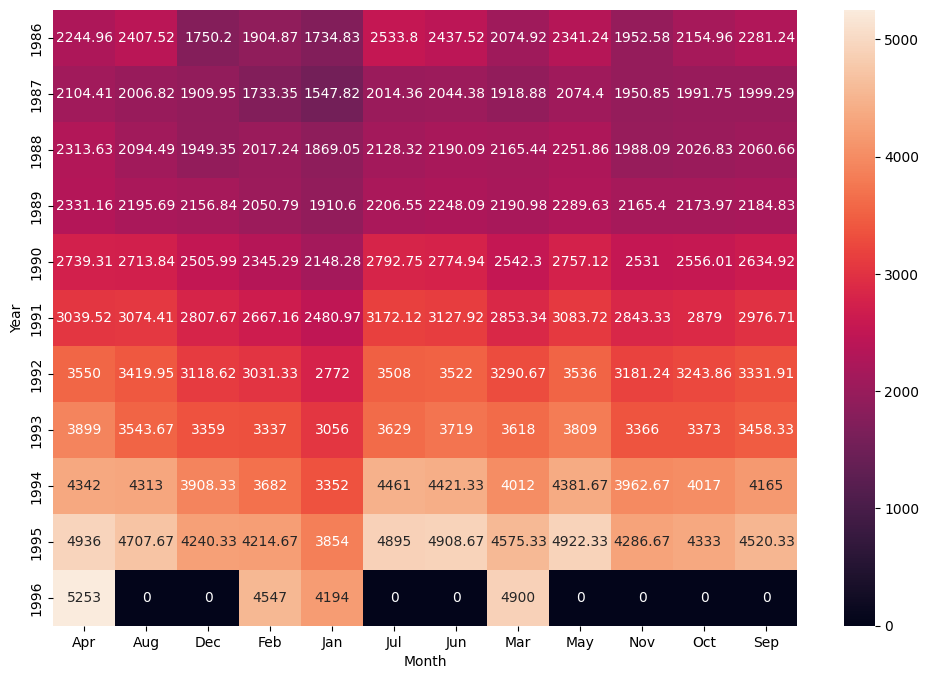

In [54]:
#plotting a heatmap of the dataset
plt.figure(figsize = (12,8))
heatmap_y_month = pd.pivot_table(data = Cola, values = 'Sales', index = 'Year', columns = 'Month', aggfunc = 'mean', fill_value = 0)
sns.heatmap(heatmap_y_month, annot = True, fmt = 'g')

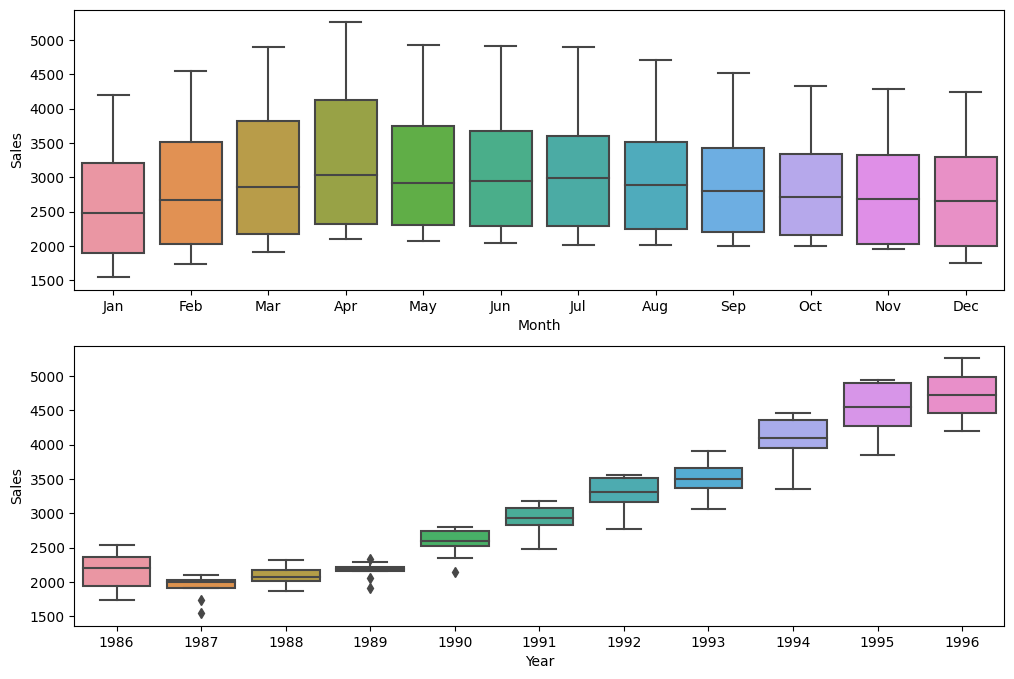

In [59]:
#box plot for every month and year
plt.figure(figsize = (12,8))
plt.subplot(211)
sns.boxplot(x='Month', y = 'Sales', data = new_df)
plt.subplot(212)
sns.boxplot(x= 'Year', y = 'Sales', data= new_df)
plt.show()

<Axes: xlabel='Year', ylabel='Sales'>

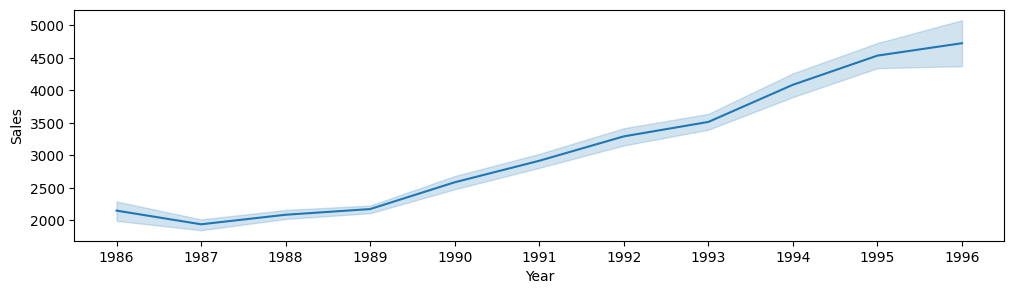

In [60]:
plt.figure(figsize = (12,3))
sns.lineplot(x= 'Year', y = 'Sales', data= new_df)

In [61]:
train = Cola.head(100)
test = Cola.tail(24)

In [62]:
#linear model
linear_model = smf.ols('Sales~t', data = train).fit()
pred_linear = pd.Series(linear_model.predict(test['t']))
rmse_linear = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_linear))**2))
rmse_linear

686.8740863668942

In [64]:
#Exponential model
Exp = smf.ols('log_Sales~t', data= train).fit()
pred_Exp = pd.Series(Exp.predict(test['t']))
rmse_Exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

530.326802509923

In [65]:
#Quadratic
Quad = smf.ols('Sales~t+t_sq', data=train).fit()
pred_Quad = pd.Series(Quad.predict(test[['t', 't_sq']]))
rmse_Quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

371.29418344986675

In [66]:
#Additive seasonality
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1837.7879723483802

In [67]:
#Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Sales~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

225.80498810355988

In [68]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1904.794417192049

In [69]:
#Multiplicative Additive Seasonality
Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

396.4197817374411

In [76]:
#Compareing the results
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea", 'rmse_ses', 'rmse_hw', 'rmse_hw_add_mul', 'rmse_hw_mul_add']),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea,rmse_ses,rmse_hw,rmse_hw_add_mul,rmse_hw_mul_add])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,225.804988
10,rmse_hw_mul_add,253.237436
9,rmse_hw_add_mul,291.078138
2,rmse_Quad,371.294183
6,rmse_Mult_add_sea,396.419782
1,rmse_Exp,530.326803
0,rmse_linear,686.874086
7,rmse_ses,802.747537
8,rmse_hw,802.747537
3,rmse_add_sea,1837.787972


In [71]:
#As the RMSE values is the lowest for Additive Trend and Additive Seasonalty for the quadratic model therefore this model will be preffered over the other models in analysis